In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [89]:
# 설치후 런타임 다시하고 실행
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

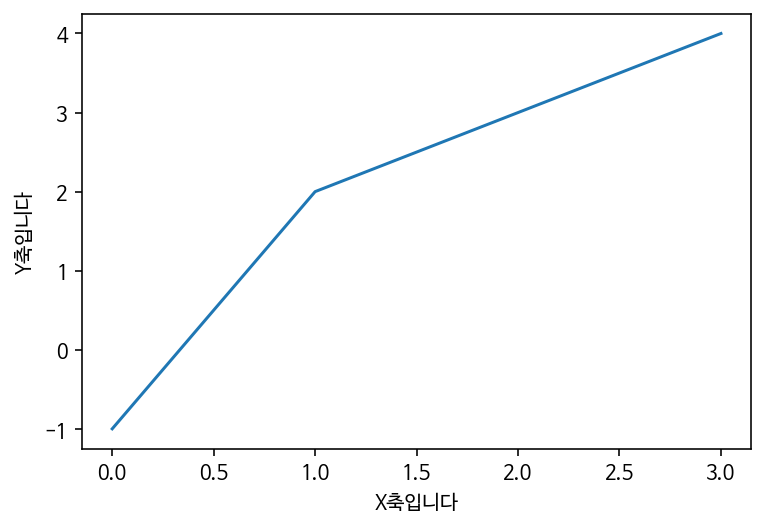

In [90]:
# 한글 잘 나오는지 테스트
plt.plot([-1, 2, 3, 4])
plt.xlabel('X축입니다')
plt.ylabel('Y축입니다')
plt.show()

## **Video Game Sales analyze**
비디오 게임 데이터 분석 프로젝트

### **데이터 컬럼 설명**

순위(Rank) - 전체 매출 순위

이름(Name) - 게임 이름

플랫폼(Platform) - 게임 출시 플랫폼(예: PC, PS4 등)

연도(Year) - 게임 출시 연도

장르(Genre) - 게임의 장르

퍼블리셔(Publisher) - 게임 퍼블리셔

NA_Sales - 북미 판매(백만 단위)

EU_Sales - 유럽 판매(백만 단위)

JP_Sales - 일본 판매(백만 단위)

Other_Sales - 전 세계 판매(백만 단위)

Global_Sales - 전 세계 총 판매량입니다

In [91]:
# 일괄설정 눌러서 원하는 데이터만 확보, 행/열 전환으로 필요한 데이터셋 확보
# 드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

import io
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'


plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/My Drive/Ai_camp/vgames2.csv'
filename

#pandas read_csv로 불러오기
data = pd.read_csv(filename)
data

# pd.read_csv('~~.csv', unicode = 'cp949')도 가능 => 한글 불러오기


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [150]:
# 불필요한 열 삭제
data = data.drop(['Unnamed: 0'],axis=1)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [94]:
# 결측치 확인
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

**사본 만들어서 데이터 결측값은 모두 삭제하였습니다**
* 데이터 원본 건들이지 않기 위해 사본 사용
* 데이터 수가 10,000명 이상으로 충분히 많으므로 결측치 처리해도 충분하다 판단
* 날짜, 출판은 임의로 대체하기 힘드므로 정확성을 위해서 결측값 삭제 처리

In [95]:
# df.dropna() : 결측값 제거
df = data.copy()
df = df.dropna()     # 결측값 제거하여 데이터에 그대로 적용시켜줌
df = df.reset_index(drop=True)      # 결측값 제거한 데이터셋 인덱스 다시 적용

In [96]:
df.isnull().sum()   # 결측값이 완전 삭제된 것을 볼 수 있다.

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [97]:
print(df.info())  # 데이터 상태 살펴보기
# 수치형 데이터들이 objuct으로 표현된 것을 볼 수 있다 (NA_Sales : Other_Sales 까지)
# 수치형 데이터 연산하려면 최소 데이터 변환 필요해 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB
None


In [98]:
# Year 이상수치 확인
# 년도 데이터 이상수치 확인 및 담아두기
year = df.Year.unique()

temp = []
for i in year:
    if i <= 1900:
        print(i)
        temp.append(i)

9.0
97.0
11.0
15.0
3.0
96.0
6.0
8.0
1.0
5.0
4.0
10.0
98.0
7.0
16.0
86.0
14.0
95.0
2.0
13.0
0.0
12.0
94.0


Year의 데이터를 확인해보니 년도의 뒷자리만 있는 데이터가 있었다.
게임명을 확인해보고 검색했더니 80이상은 1900년도 이하는 2000년도라는 것을 알 수 있었다

=> 데이터 통일 필요

**print(df.loc[:,['year', 'continent']])**

위 구문은 모든행(:)에 대해 ''year'와 'continent' 열 데이터만 가져와라라는 명령어입니다.


In [99]:
# 데이터 수치 통일화를 위해서 년도 데이터 변경
# df.values 를 사용하면 DataFrame의 값에 해당하는 부분만 추출 가능하다
df.loc[(df.Year.values <= 80), 'Year'] += 2000
# 년도 값이 80이하인 열중에서 year열만 추출해서 2000 더해라 

df.loc[((df.Year.values >= 80) & (df.Year.values <= 100)), 'Year'] += 1900
# 년도 값이 80이상이거나 100미만 중에서 year열만 추출해서 1900 더해라 

# 변경확인
df.Year.value_counts()  # 데이터가 맞게 뜨는 것을 확인할 수 있다.

2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
# 날짜 처리 다른 방법 
# def year(x):
#  if (x >= 0) & (x < 20):
#    return int(2000 + x)
#  elif (x > 30) & (x < 1000):
#    return int(1900 + x)
#  else:
#    return int(x)

# df['Year'] = df['Year'].apply(year)
# df

In [100]:
df.NA_Sales.unique() # 각 수치 살펴보기
# 데이터 이상값 체크하기
# df.NA_Sales.value_counts() :  수치 체크
# 숫자 값에 M,N 이 있는게 보이므로 제거해 줘야 한다.

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [101]:
# M 포함하는 열 모두 대체 < 단위가 백만으로 똑같으므로 0으로 대체해도 무방하다
# str.replace('M', '') : 문자열 대체할때 사용한다.
df['NA_Sales'] = df['NA_Sales'].str.replace('M', '')
df['EU_Sales'] = df['EU_Sales'].str.replace('M', '')
df['JP_Sales'] = df['JP_Sales'].str.replace('M', '')
df['Other_Sales'] = df['Other_Sales'].str.replace('M', '')

df.Other_Sales.unique() # 각 수치 살펴보기
# M이 모두 삭제된 것을 알 수 있다.

array(['0', '0.01', '0.04', '0.06', '0.15', '0.23', '0.02', '0.08',
       '0.05', '0.03', '0.1', '0.2', '0.9', '0.32', '0.07', '0.34',
       '0.22', '0.37', '0.14', '1.07', '10K', '0.25', '0K', '0.24',
       '0.16', '0.09', '0.21', '0.58', '30K', '0.13', '0.18', '0.12',
       '0.27', '0.77', '0.39', '0.44', '0.26', '1.18', '0.11', '0.72',
       '0.28', '0.19', '1.09', '0.54', '1.75', '2.46', '0.31', '0.17',
       '0.33', '1.16', '0.7', '50K', '0.42', '0.29', '0.41', '0.61',
       '1.14', '0.64', '0.43', '0.3', '0.35', '0.66', '0.4', '2.02',
       '0.79', '0.69', '0.73', '0.99', '40K', '80K', '0.36', '1.26',
       '0.52', '1.73', '0.47', '1.68', '0.48', '1.32', '0.59', '8.46',
       '2.85', '1.23', '0.75', '1.47', '0.49', '0.88', '0.57', '2.96',
       '2.15', '4.14', '0.53', '0.38', '0.46', '0.65', '0.51', '1.04',
       '2.52', '0.78', '1.67', '1.48', '0.87', '1.41', '20K', '0.5',
       '1.78', '340K', '0.71', '60K', '0.63', '0.82', '0.45', '1.05',
       '2.12', '1.29', '1

In [102]:
# str.contains()만 했을때 어떤 타입이 나오는지 확인해보겠습니다. 
# 이 함수는 column을 대상으로 찾는 기능이므로 찾을 대상을 column으로 지정하고 해야합니다.
# 특정 컬럽열의 부분값 포함하고 있는지 찾아주는 함수

df['NA_Sales'].str.contains('K')  # TRUE, FALSE로 볼 수 있다

# 특정 값 포함하는 셀 확인할 수 있음
df[df['NA_Sales'].str.contains('K')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
866,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1071,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15308,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
15846,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
15978,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16137,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [103]:
# 인덱싱값을 행과 열 모두 받으려면 df.loc[행 인덱스, 열 인덱스]와 같은 형태로 사용한다
# df.astype(float) : 실수로 데이터 프레임 바꿔주는 함수
# df1 = df.copy()    # 원본 훼손 방지겸 다시 카피
# Sales  

sales_col = df.columns[5:]    # 012345 순으로 열이 정렬되므로 6번째 부터 추출하려면 5: => sales열 다 추출

# K인 곳의 인덱스 저장
del_kn = df[df.NA_Sales.str.contains('K')].index

for col in sales_col:
    # k만 포함하는 데이터 가져오기
    del_k = df.loc[df[col].str.contains('K'), col]
    # k만 포함하는 데이터 가져오기
    del_m = df.loc[df[col].str.contains('M'), col]
    # K빼고 저장하고 실수로 변환후 1000 나누기 ( 단위 통함 )
    del_k = del_k.str.replace('K', '').astype(float) / 1000
    # M빼고 저장하고 실수로 변환( 단위 동일하므로 삭제하면 된다)
    del_m = del_m.str.replace('M', '').astype(float)
    
    # 기존 type이 string이기 때문에 변경해서 저장
    df.loc[df[col].str.contains('K'), col] = del_k.astype(str)
    df.loc[df[col].str.contains('M'), col] = del_m.astype(str)

df.loc[del_kn] # 인덱스 저장시킨열 반영하기

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0.0,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0.0,0.02,0,0
866,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0.0,0,0.04,0
1071,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0.0,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15308,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.0,0.01,0,0
15846,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,0.12,0.15,0,0.06
15978,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,0.72,0.56,0,0.19
16137,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12


In [104]:
# sales 데이터 모두 실수형으로 변환
col = df.columns[-4:]
col

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

In [105]:
df[col] = df[col].astype(float)  # 해당열 모두 실수형으로 전환
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [106]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [107]:
# 전세계 판매값 구하기
df['Total_sales'] = df['NA_Sales'] +  df['EU_Sales']  +  df['JP_Sales']  +  df['Other_Sales'] 
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


**Q. 지역에 따라서 선호하는 게임 장르가 다를까**

In [108]:
# 지역 : NA_Sales - 북미 판매(백만 단위), EU_Sales - 유럽 판매(백만 단위), JP_Sales - 일본 판매(백만 단위), 장르 : genre

In [151]:
# Python pandas에서 groupby를 집계할 때, agg()를 이용하면 다수의 함수를 한번에 적용할 수 있습니다.
# 변수 = dataframe.groupby('column').column.agg(['mean', 'min', 'max', 'sum'])
# group by는 리스트를 기반으로 그룹 묶는게 가능 
# 분석할 컬럼들만 따로 리스트 만들어서 묶어줌

sale_col = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
sale_col.columns = ['장르', '미국 판매량', '유럽 판매량', '일본 판매량', '기타 판매량']
sales_group = sale_col.groupby(['장르']).sum()        # sum이나 mean으로 구해줌
sales_group

,미국 판매량,유럽 판매량,일본 판매량,기타 판매량
장르,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [ ]:
group = sales_group.reset_index()  # 리스트 다시 설정해서 보여줌
group

print('미국 판매량')
test1 = group.sort_values('미국 판매량',ascending=False)
print(test1)


print('유럽 판매량')
test2 = group.sort_values('유럽 판매량',ascending=False)
print(test2)


print('일본 판매량')
test3 = group.sort_values('일본 판매량',ascending=False)
print(test3)


print('기타 판매량')
test4 = group.sort_values('기타 판매량',ascending=False)
print(test4)

미국 판매량
              장르  미국 판매량  유럽 판매량  일본 판매량  기타 판매량
0         Action  858.75  513.64  156.60  183.99
10        Sports  667.26  370.97  134.76  132.35
8        Shooter  574.48  310.23   38.18  101.86
4       Platform  445.38  200.63  130.53   51.45
3           Misc  394.73  208.15  104.18   72.64
6         Racing  354.70  235.02   56.32   76.51
7   Role-Playing  318.76  183.09  342.93   56.73
2       Fighting  220.35   99.90   87.14   36.15
9     Simulation  181.43  112.99   63.54   31.32
5         Puzzle  121.58   50.47   56.24   12.44
1      Adventure  101.79   63.66   51.87   16.70
11      Strategy   67.83   44.82   49.10   11.23
유럽 판매량
              장르  미국 판매량  유럽 판매량  일본 판매량  기타 판매량
0         Action  858.75  513.64  156.60  183.99
10        Sports  667.26  370.97  134.76  132.35
8        Shooter  574.48  310.23   38.18  101.86
6         Racing  354.70  235.02   56.32   76.51
3           Misc  394.73  208.15  104.18   72.64
4       Platform  445.38  200.63  130.53   51.45
7   Ro

**미국 판매량**

Action > Sports > shooter > Platform > MIsc >  Raching > Role - Playing > Fighting > Simulation > Puzzle > Adventure > Strategy 

**유럽 판매량**

Action > Sports > shooter > Raching > MIsc > Platform >  Role - Playing >  Simulation > Fighting > Adventure > Strategy > Shooter

**일본 판매량**

Role - Playing > Action > Sports > Platform  > Misc > Fighting  > Simulation  > Racing > Puzzle> Strategy > Adventure > Shooter

**기타 판매량**

 Action > Sports > shooter > Raching > MIsc > Role - Playing > Platform > Fighting > Simulation > Adventure > Puzzle > Strategy 

In [ ]:
value_vars = group.columns[1:]
value_vars

Index(['미국 판매량', '유럽 판매량', '일본 판매량', '기타 판매량'], dtype='object')

In [ ]:
df_melt = pd.melt(group, id_vars=['장르'], value_vars=group.columns[1:], var_name='판매국가', value_name='판매량')
df_melt

,장르,판매국가,판매량
0,Action,미국 판매량,858.75
1,Adventure,미국 판매량,101.79
2,Fighting,미국 판매량,220.35
3,Misc,미국 판매량,394.73
4,Platform,미국 판매량,445.38
5,Puzzle,미국 판매량,121.58
6,Racing,미국 판매량,354.70
7,Role-Playing,미국 판매량,318.76
8,Shooter,미국 판매량,574.48
9,Simulation,미국 판매량,181.43


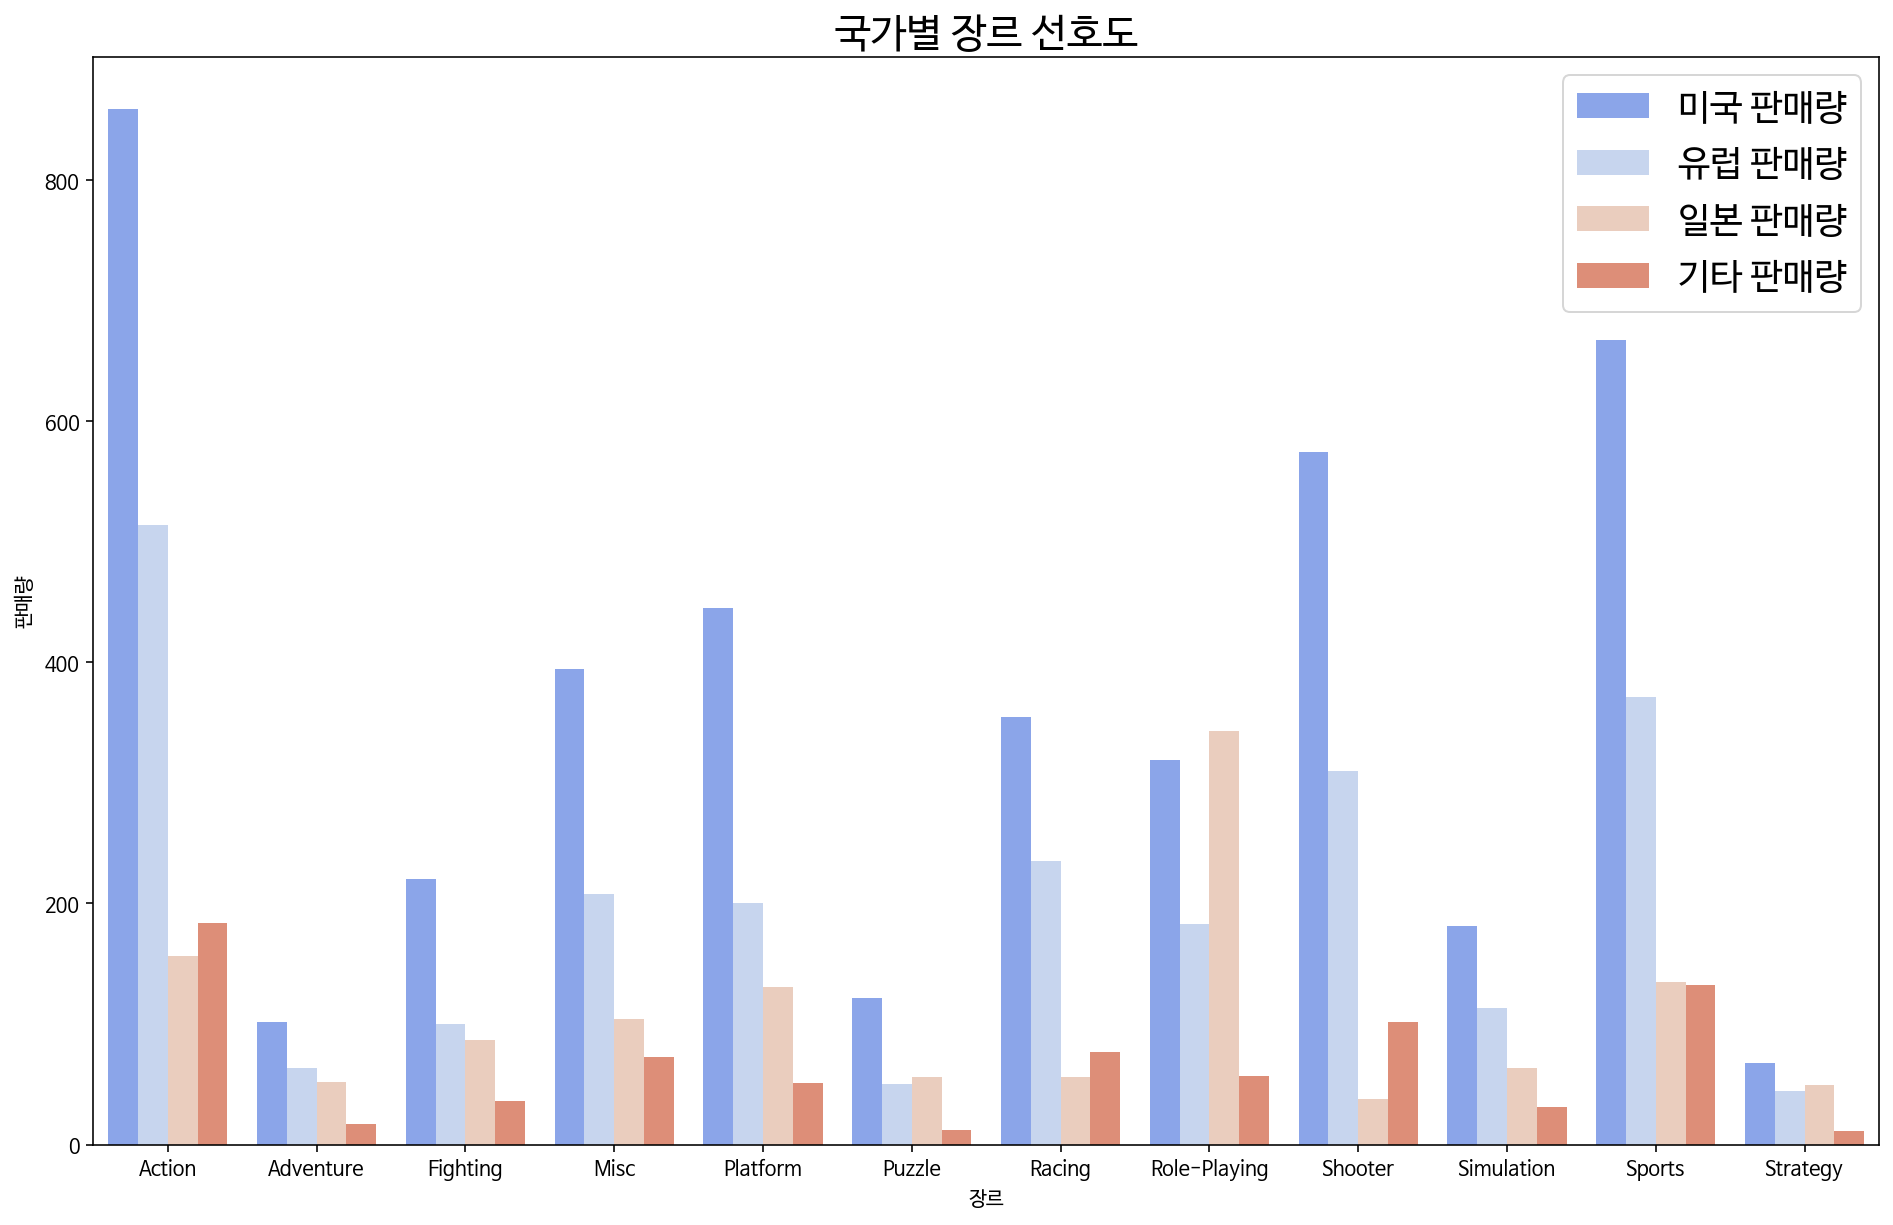

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(data = df_melt, x='장르', y='판매량', hue='판매국가', palette='coolwarm')
plt.title('국가별 장르 선호도', loc='center', fontsize=20)
plt.legend(fontsize=18)
plt.show()

각 국가별 장르 선호도를 시각화를 통해 알아볼 수 있다.



In [ ]:
# 데이터 대조해 보니까 Genre 그룹 묶고 mean에 대해서 정렬한다
# 맨 뒤가 데이터가 제일 크다
# NA1 = df.sort_values(by='Genre', ascending=False).groupby('Genre', sort=False).NA_Sales.agg(['mean'])
# NA2 = NA1.sort_values(by='mean',ascending= False)
# NA2.head(10)  # 상위 10위까지 추출

In [ ]:
# 전 대륙 선호하는 게임 장르
df_genre = df.groupby(by=['Genre'])['Total_sales'].mean()  # sum이나 mean으로 
df_genre = df_genre.reset_index()
df_genre

,Genre,Total_sales
0,Action,0.528698
1,Adventure,0.184558
2,Fighting,0.531186
3,Misc,0.463831
4,Platform,0.948442
5,Puzzle,0.425318
6,Racing,0.592740
7,Role-Playing,0.615365
8,Shooter,0.800586
9,Simulation,0.460142


**Q. 연도별 게임의 트렌드가 있을까**

In [109]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [110]:
# transform 메서드는 입력된 개체와 동일하게 인덱스된 객체를 반환한다

year = df.groupby(by=['Year', 'Genre'])['Total_sales'].sum().reset_index()
year_sale = year.groupby(by=['Year'])['Total_sales'].transform(max) == year['Total_sales']
year_sale

0      False
1      False
2      False
3       True
4       True
       ...  
383    False
384    False
385    False
386     True
387     True
Name: Total_sales, Length: 388, dtype: bool

In [111]:
year_sale_max = year[year_sale].reset_index(drop=True)
year_sale_max


,Year,Genre,Total_sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.79
2,1982.0,Puzzle,10.04
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10
5,1985.0,Platform,43.17
6,1986.0,Action,13.74
7,1987.0,Fighting,5.42
8,1988.0,Platform,27.73
9,1989.0,Puzzle,37.75


In [112]:
genre = year_sale_max['Genre']
genre

0          Shooter
1           Action
2           Puzzle
3         Platform
4          Shooter
5         Platform
6           Action
7         Fighting
8         Platform
9           Puzzle
10        Platform
11        Platform
12        Fighting
13        Platform
14        Platform
15        Platform
16    Role-Playing
17          Racing
18          Sports
19    Role-Playing
20          Sports
21          Action
22          Action
23          Action
24          Action
25          Action
26          Sports
27          Action
28          Action
29          Sports
30          Action
31          Action
32          Action
33          Action
34          Action
35          Action
36          Action
37    Role-Playing
38      Simulation
Name: Genre, dtype: object

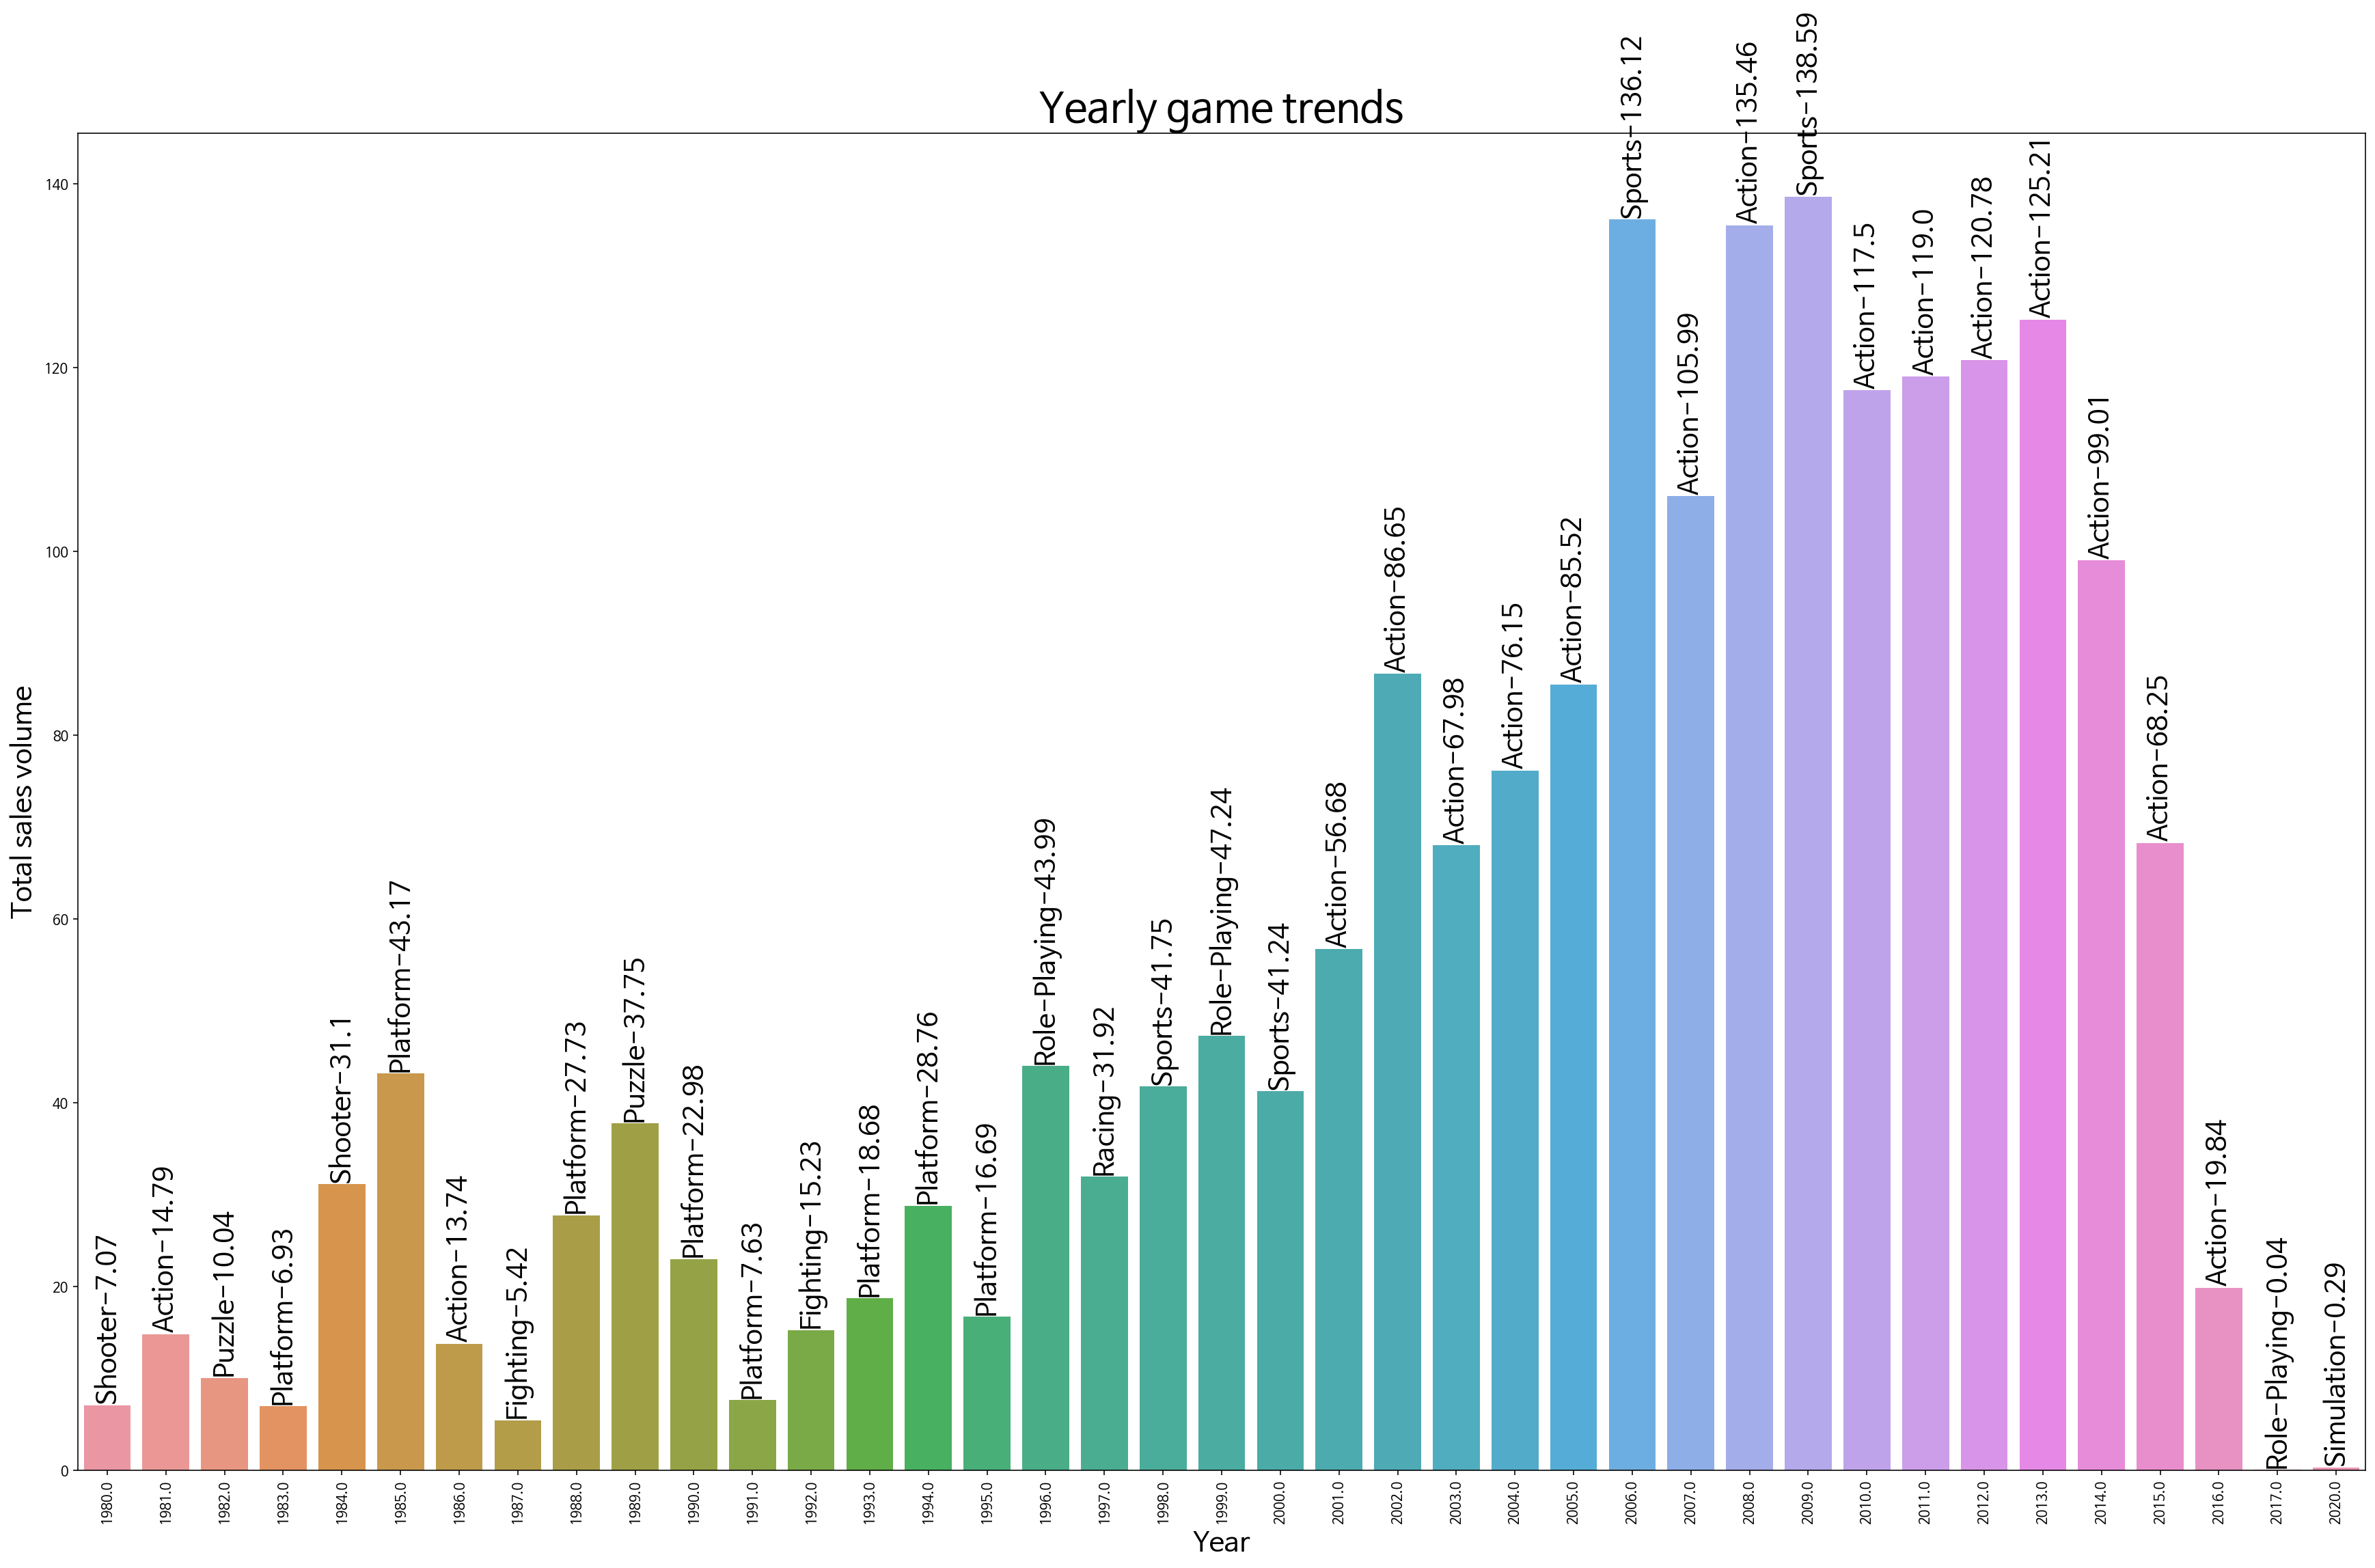

In [114]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Total_sales', data=year_sale_max)
index = 0
for value in year_sale_max['Total_sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()

* 약 2000년도 까지는 대체적으로 다양하게 수요가 있었다.
* 게임 수요가 급증하는 2001년 부터 급증하였는데 액션 게임의 비중이 매우 크다
* 2006년과 2009년에는 스포츠장르의 수요가 액션 장르를 능가 했다
* 월드컵의 영향에 따라 게임 수요도 같이 증가함을 알 수 있다.

**Q. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 함**

In [161]:
# 출시량 데이터 프레임 만들기
year_max = df.groupby(['Year', 'Publisher']).size()
year_max

Year    Publisher                   
1980.0  Activision                       4
        Atari                            4
1981.0  20th Century Fox Video Games     3
        Activision                       6
        Atari                           11
                                        ..
2016.0  Yeti                             1
        dramatic create                  2
2017.0  Idea Factory                     1
        Sega                             2
2020.0  Ubisoft                          1
Length: 2320, dtype: int64

In [157]:
# 카운트라는 열을 새로 만들어 준다
year_max = year_max.reset_index(name='count')
year_max

,Year,Publisher,count
0,1980.0,Activision,4
1,1980.0,Atari,4
2,1981.0,20th Century Fox Video Games,3
3,1981.0,Activision,6
4,1981.0,Atari,11
...,...,...,...
2315,2016.0,Yeti,1
2316,2016.0,dramatic create,2
2317,2017.0,Idea Factory,1
2318,2017.0,Sega,2


In [158]:
condition = year_max['count'] == year_max.groupby(['Year'])['count'].transform(max)
condition

year_max = year_max[condition]
# year_max[:15]

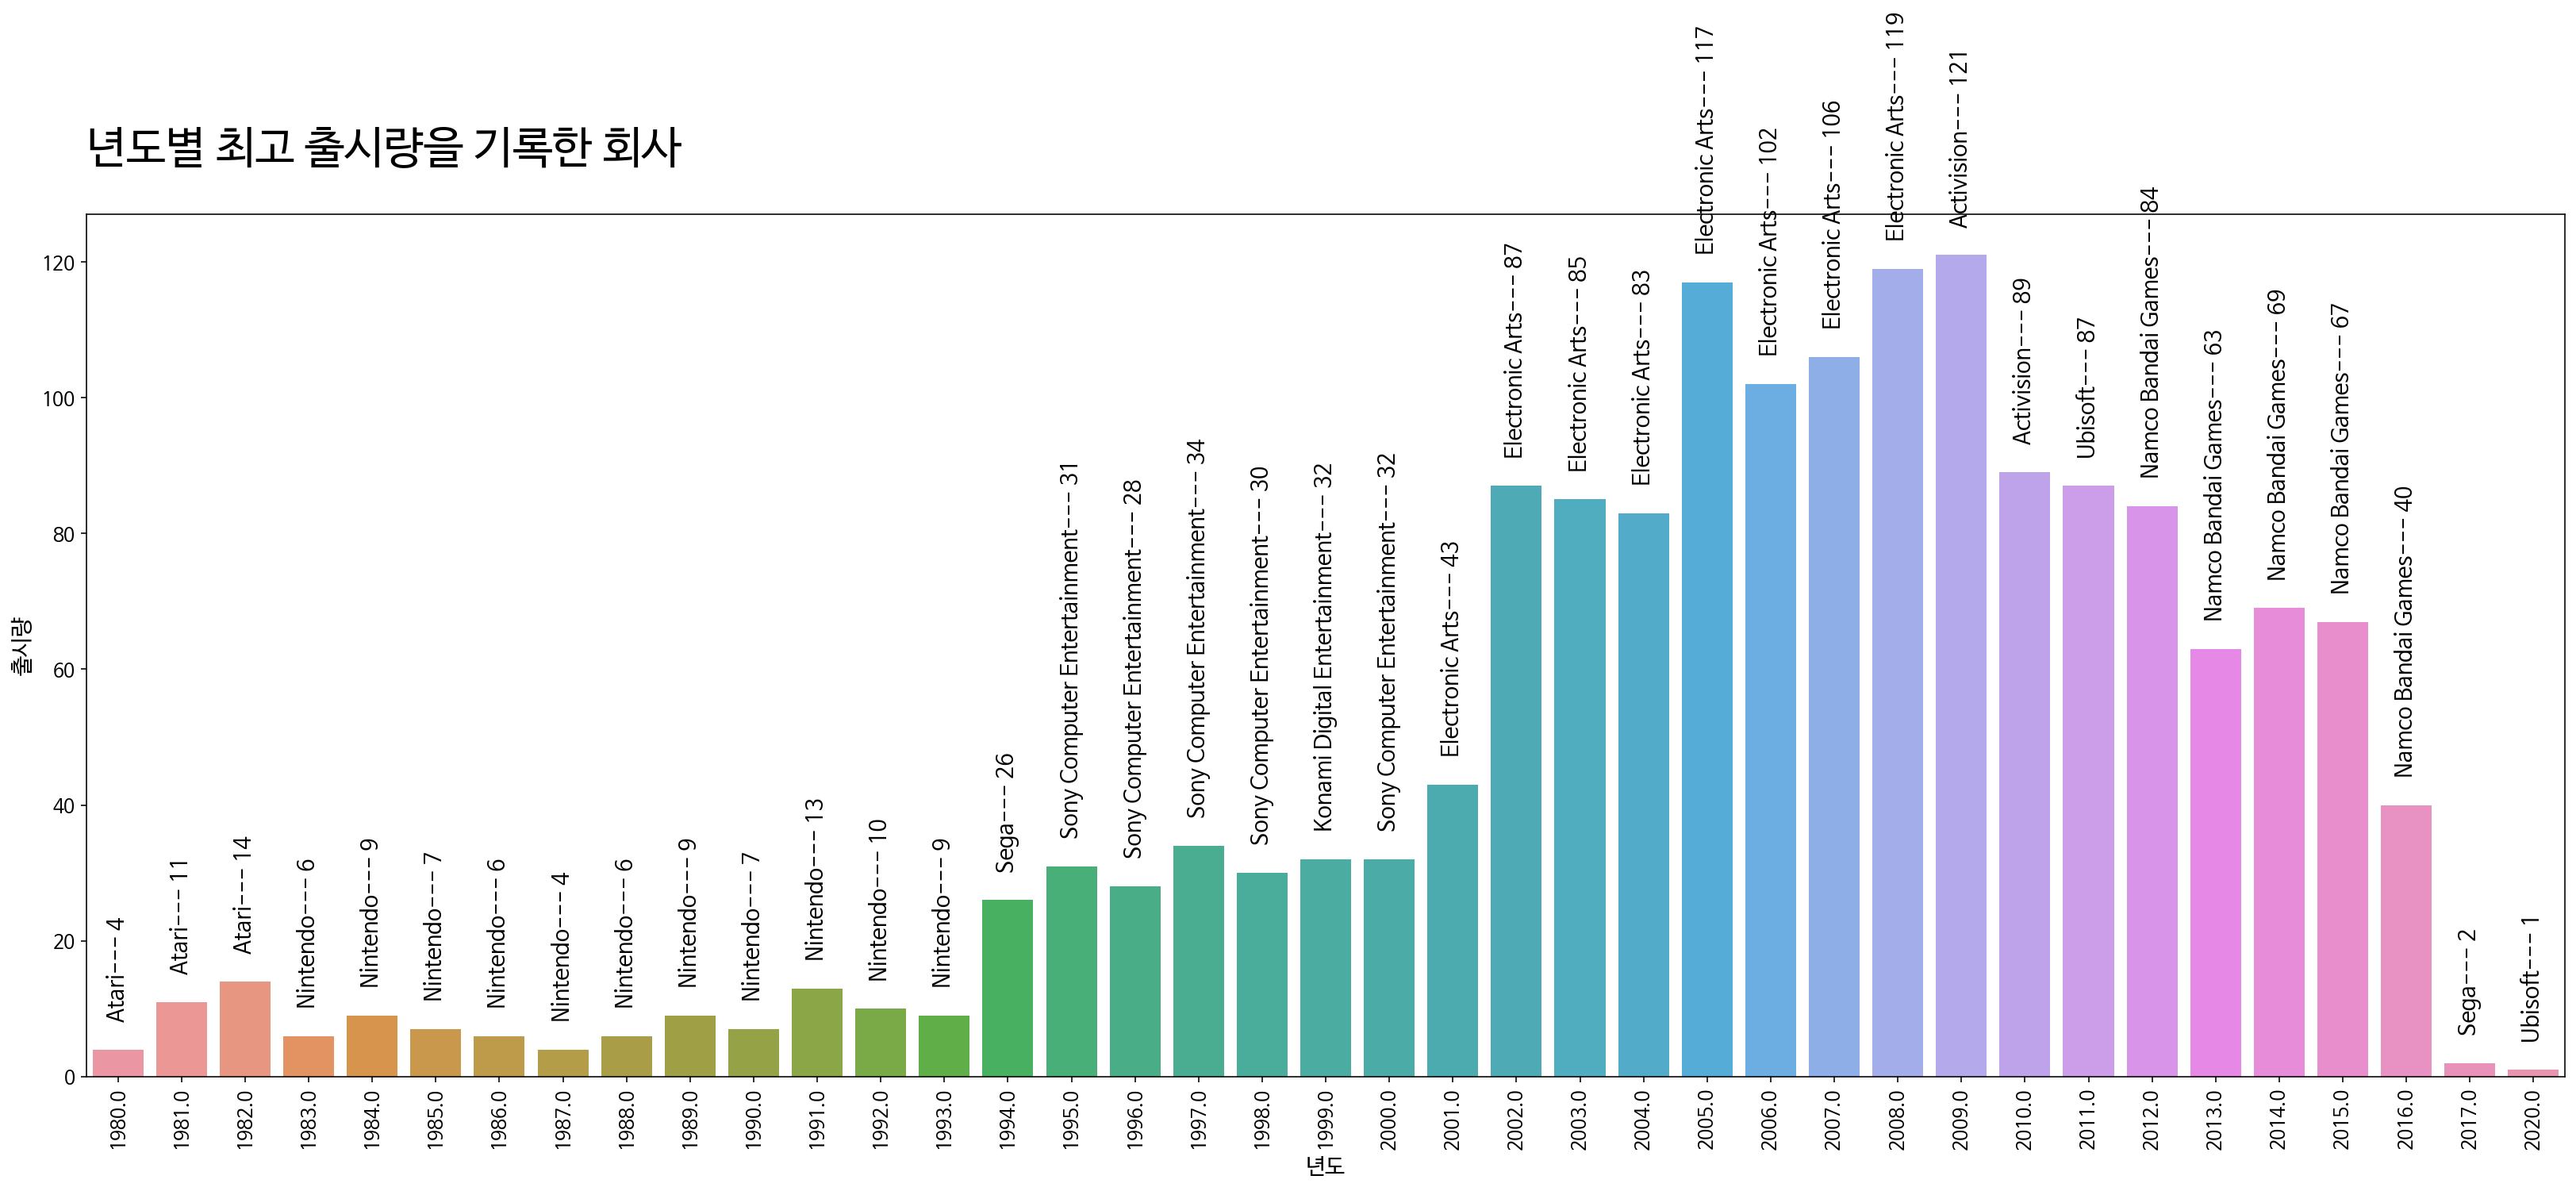

In [159]:
# 중복값 제외하기
year_max = year_max.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max.columns = ['년도', '회사명', '출시량']

# 회사명 값 저장
publisher = year_max.회사명

# 그래프 그리기
plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max)
idx = 0
for value in year_max['출시량']:
    ax.text(x=idx, y=value + 5, s=str(publisher[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('년도별 최고 출시량을 기록한 회사', fontsize=28, y=1.05, loc='left')
plt.show()

2000년대 부터 2008년까지 Electric arts의 출시량이 독보적으로 많다. 

2009년부터는 acrivision이란 회사가 우위를 차지하는 것을 볼 수 있다.

**Q. 퍼블리서와 장르 카이검정**
* 장르(Genre) - 게임의 장르
* 퍼블리셔(Publisher) - 게임 퍼블리셔

In [123]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [132]:
df_pg = df.loc[:, ['Genre',	'Publisher']] # 필요한 열만 추출
df_pg

,Genre,Publisher
0,Action,Destineer
1,Action,Namco Bandai Games
2,Adventure,Alchemist
3,Misc,Zoo Games
4,Platform,D3Publisher
...,...,...
16236,Platform,Vivendi Games
16237,Action,Rising Star Games
16238,Sports,Take-Two Interactive
16239,Action,Tecmo Koei


In [133]:
df_pg = df_pg.set_index('Genre')  # 첫번째 열 인덱스로 빼기
df_pg

,Publisher
Genre,
Action,Destineer
Action,Namco Bandai Games
Adventure,Alchemist
Misc,Zoo Games
Platform,D3Publisher
...,...
Platform,Vivendi Games
Action,Rising Star Games
Sports,Take-Two Interactive


In [134]:
# 범주형 카이 가설검정
import pandas as pd
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['Genre'], df['Publisher'], margins = True)
crosstab

Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Answer Software,Aqua Plus,Aques,Arc System Works,...,Video System,Views,Vir2L Studios,Virgin Interactive,Virtual Play Games,Visco,Vivendi Games,Wanadoo,Warashi,Wargaming.net,Warner Bros. Interactive Entertainment,Warp,WayForward Technologies,Westwood Studios,White Park Bay Software,Wizard Video Games,XS Games,Xicat Interactive,Xing Entertainment,Xplosiv,Xseed Games,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN,All
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0,0,4,0,17,0,21,5,0,0,2,0,1,0,0,0,1,14,0,4,2,307,1,1,1,0,1,2,1,1,3,1,0,0,1,0,1,0,0,3,...,1,1,1,11,0,0,43,2,0,0,150,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,8,3,1,0,1,0,0,0,0,0,1,0,3240
Adventure,1,0,0,0,3,0,7,49,0,0,0,0,0,2,7,0,0,4,0,1,2,25,0,0,0,0,0,0,3,0,32,0,0,0,0,0,0,13,0,10,...,0,1,0,1,0,0,7,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,9,0,1,0,7,1,1,0,4,0,0,0,1,0,0,0,1268
Fighting,0,0,0,0,1,0,11,1,0,0,0,2,0,0,0,0,0,31,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,7,...,0,0,0,19,0,0,4,0,0,0,11,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,835
Misc,0,0,0,0,0,0,31,0,1,0,0,3,0,2,0,1,0,5,0,0,0,103,0,1,0,0,1,1,0,0,4,0,0,2,0,0,0,5,0,1,...,0,0,0,1,1,0,8,0,0,0,22,0,0,0,0,0,2,0,0,3,0,0,2,0,0,0,2,18,11,1,0,0,0,0,0,0,0,0,0,1681
Platform,0,0,0,0,1,0,6,0,0,0,0,0,0,0,0,0,0,5,1,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,37,2,0,0,8,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,873
Puzzle,1,0,0,1,1,0,14,0,1,0,0,0,0,0,0,0,0,9,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,0,0,8,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,14,3,2,0,0,0,1,0,0,0,0,0,566
Racing,0,1,0,0,0,0,2,0,0,0,3,0,1,3,0,0,0,44,1,0,0,73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,1,0,0,14,1,0,0,3,0,0,0,0,0,5,1,0,5,0,0,0,0,1,0,0,26,6,3,1,0,0,0,0,0,0,0,0,1219
Role-Playing,0,1,0,0,1,0,10,1,0,0,0,0,0,3,2,0,0,1,0,2,8,41,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,2,0,1,...,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1465
Shooter,0,0,1,0,5,0,18,3,0,0,0,0,0,0,0,0,0,17,0,0,0,154,0,4,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,...,0,0,0,7,0,1,29,0,1,1,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,4,2,0,0,0,0,1,0,0,0,0,1280


In [135]:
#교차분석 결과값들 일괄계산
#correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result = chi2_contingency(observed= crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. 카이제곱 통계량: 25182.54362943406
2. p-value: 0.0
3. df: 6900



* 귀무가설 : 장르와 게임 퍼블리셔에 대해 관령성이 없다.
* 대립가설 : 장르와 게임 퍼블리셔에 대해 관련성이 있다.
* (결과) p-value = 0.0 이므로 유의수준 0.05보다 작으므로 귀무가설 기각
즉, 장르와 게임 퍼블리셔에 대해 관련성이 있음을 알 수 있다!

**Q. 게임이름과 플랫폼 카이검정**
* 이름(Name) - 게임 이름
* 플랫폼(Platform) - 게임 출시 플랫폼(예: PC, PS4 등)

In [144]:
df_ng = df.loc[:, ['Name','Genre']] # 필요한 열만 추출
df_ng

,Name,Genre
0,Candace Kane's Candy Factory,Action
1,The Munchables,Action
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure
3,Deal or No Deal: Special Edition,Misc
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform
...,...,...
16236,Ice Age 2: The Meltdown,Platform
16237,Rainbow Islands: Revolution,Action
16238,NBA 2K16,Sports
16239,Toukiden: The Age of Demons,Action


In [145]:
df_ng = df_np.set_index('Genre')  # 첫번째 열 인덱스로 빼기
df_ng

,Name
Genre,
Action,Candace Kane's Candy Factory
Action,The Munchables
Adventure,Otome wa Oanesama Boku ni Koi Shiteru Portable
Misc,Deal or No Deal: Special Edition
Platform,Ben 10 Ultimate Alien: Cosmic Destruction
...,...
Platform,Ice Age 2: The Meltdown
Action,Rainbow Islands: Revolution
Sports,NBA 2K16


In [146]:
# 범주형 카이 가설검정
import pandas as pd
from scipy.stats import chi2_contingency

crosstab2 = pd.crosstab(df['Genre'], df['Name'], margins = True)
crosstab2

Name,'98 Koshien,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol.2//Reminisce,.hack//G.U. Vol.2//Reminisce (jp sales),.hack//G.U. Vol.3//Redemption,.hack//Infection Part 1,.hack//Link,.hack//Mutation Part 2,.hack//Outbreak Part 3,.hack//Quarantine Part 4: The Final Chapter,.hack: Sekai no Mukou ni + Versus,007 Racing,007: Quantum of Solace,007: The World is not Enough,007: Tomorrow Never Dies,1 vs. 100,1/2 Summer +,10 Minute Solution,100 All-Time Favorites,100 Classic Books,100 Classic Games,1000 Cooking Recipes from ELLE à table,1001 Touch Games,101-in-1 Explosive Megamix,101-in-1 Party Megamix Wii,101-in-1 Sports Megamix,101-in-1 Sports Party Megamix,1080°: TenEighty Snowboarding,11eyes: CrossOver,12-Sai. Honto no Kimochi,12-Sai. Koisuru Diary,12Riven: The Psi-Climinal of Integral,15 Days,1701 A.D.,18 Wheeler: American Pro Trucker,18 Wheels of Steel: Extreme Trucker,18 Wheels of Steel: Extreme Trucker 2,187: Ride or Die,1942,2 Games in 1 Double Pack: Hot Wheels Velocity X / Hot Wheels World Race,...,Zoo Tycoon 2 DS,Zoo Tycoon 2: Ultimate Collection,Zoo Tycoon DS,Zoo Tycoon: Complete Collection,Zoo Vet: Endangered Animals,ZooCube,Zoobles! Spring to Life!,Zoop,Zubo,Zumba Fitness,Zumba Fitness 2,Zumba Fitness Core,Zumba Fitness Rush,Zumba Fitness: World Party,Zwei!!,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,[Prototype 2],[Prototype],de Blob,de Blob 2,echochrome,ef - a fairy tale of the two.,everGirl,futureU: The Prep Game for SAT,htoL#NiQ: The Firefly Diary,iCarly,iCarly 2: iJoin The Click!,inFAMOUS,inFAMOUS 2,inFAMOUS: Second Son,nail'd,pro evolution soccer 2011,th!nk Logic Trainer,thinkSMART,thinkSMART FAMILY!,thinkSMART: Chess for Kids,uDraw Studio,uDraw Studio: Instant Artist,¡Shin Chan Flipa en colores!,All
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,0,0,0,1,0,6,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,3240
Adventure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1268
Fighting,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,835
Misc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,2,0,1681
Platform,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,873
Puzzle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,566
Racing,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1219
Role-Playing,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1465
Shooter,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1280


In [147]:
#교차분석 결과값들 일괄계산
#correction=True를 적용하면 Yates' correction이 적용 되어 검정통계량이 보수적으로 더 낮게 나옴
result = chi2_contingency(observed= crosstab2, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. 카이제곱 통계량: 178585.62641758026
2. p-value: 0.0
3. df: 135540


* 귀무가설 : 장르와 게임이름에 대해 관련성이 없다.
* 대립가설 : 장르와 게임이름에 대해 관련성이 있다.

(결과) p-value = 0.0 이므로 유의수준 0.05보다 작으므로 귀무가설 기각 즉, 장르와 게임이름에 대해 관련성이 있음을 알 수 있다!